In [2]:
import missingno
import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys

from matplotlib import rcParams
from win32ui import types

print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Python version: 3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC v.1934 64 bit (AMD64)]
Pandas version: 2.2.2
Numpy version: 2.1.1
Matplotlib version: 3.9.2


In [3]:
data_s = pd.read_excel('./data/湖南.xls',index_col=0)

In [4]:
data_n = pd.read_excel('./data/湖北.xls')

In [4]:
from rich import print
# 判断有无重复行
data_n.duplicated().value_counts()
data_s.duplicated().value_counts()

False    13361
Name: count, dtype: int64

In [5]:
# 缺失值检测,如果某个字段的缺失值数量超过一千,则删除该字段
miss_count = data_s.isna().sum()
data_s = data_s.loc[:,miss_count<=1000]

In [12]:
miss_count

平台                0
经营单位              0
仓库                0
发货流水号             0
送货客户              0
               ... 
是否客户区域金额统计打印      0
是否门店仓飞单         151
是否采购退转采购入         0
是否同步单据到售后         0
快递运输是否报价          0
Length: 105, dtype: int64

In [6]:
miss_count = data_n.isnull().sum()
data_n = data_n.loc[:,miss_count<=1000]

In [9]:
data_n.shape

(10681, 106)

In [7]:
columns = ['发货流水号','送货客户','地址流水号','应收客户','开票客户','送货人','商务签收人名','物流签收人名',
'财务签收时间','财务签收人','放货人','销售业务员','原始单据扫描信息','创建人NO','创建人名称','提交人NO',
 '提交人名称','核算部门节点NO','成本中心','币种','是否是费用发货'
]
columns2 =['发货流水号','送货客户','地址流水号','应收客户','开票客户','送货人','商务签收人名','物流签收人名',
'财务签收时间','财务签收人','放货人','销售业务员','原始单据扫描信息','创建人NO','创建人名称','提交人NO',
 '提交人名称','核算部门节点NO','成本中心','币种','打印人', '打印时间'
]

In [8]:
data_s.drop(columns,axis=1,inplace=True)
data_n.drop(columns2,axis=1,inplace=True)

In [9]:
data_s['province'] = '湖南'

In [10]:
data_n['province'] = '湖北'

In [11]:
data = pd.concat([data_s,data_n[data_s.columns]],axis=0)

In [12]:
# select_dtypes用于选择某种特定类型的数据
data_num = data.select_dtypes(['int','float'])
data_cat = data.select_dtypes(['object'])
data_time = data.select_dtypes(['datetime'])

In [17]:
data_num['province'] = data['province']

In [20]:
data_num.drop(labels = ['回款金额','实际成本金额','水单金额','成本金额','发货成本金额','签收金额','拣货小包装数量','发货净重'],axis=1,inplace=True)

In [33]:
from pyecharts import options as opts
import json
import os
import numpy as np
from pyecharts.charts import Map

# 获取文件列表
filenames = os.listdir('./data/maps/')

# 创建湖南湖北的地理数据集合
hnhb = {'type': 'FeatureCollection', 'features': []}
for i in filenames:
    with open(f"./data/maps/{i}", 'r', encoding='utf-8') as f:
        data = json.loads(f.read())
        hnhb['features'].append(data)

target_data = """{
        "type": "FeatureCollection",
        "features": []}"""
target_data = json.loads(target_data)

list_region = os.listdir('./data/maps/')
name_list = []
for lr in list_region:
    with open(f"./data/maps/{lr}", 'r', encoding='utf-8') as f:
        temp = json.load(f)
        temp = temp['features']
        for tp in temp:
            name = tp['properties']['name']
            if name in ['湖南省', '湖北省']:
                # 将 area 加入 tp 节点并传入 target_data
                tp['properties']['area'] = '湖南湖北'
                target_data['features'].append(tp)
                name_list.append((name, np.random.randint(100, 5000)))

# 创建地图对象
maps = Map(init_opts=opts.InitOpts(theme='light',
                                      width='1000px',
                                      height='600px'))

# 注册湖南湖北地图
maps.add_js_funcs(f"echarts.registerMap('湖南湖北', {target_data});")

# 绘制湖南湖北地图，不显示具体市的数据
maps.add("湖南湖北", [('湖南湖北', np.random.randint(100, 5000))], maptype='湖南湖北')

# 渲染地图
maps.render()

'C:\\Users\\wang\\Desktop\\pyLearn\\综合实训课程1\\物流分析项目\\render.html'

In [35]:
from pyecharts import options as opts
import json
import os
filenames = os.listdir('./data/maps/')
hnhb = {'type': 'FeatureCollection','features':[]}
for i in filenames:
    with open(f"./data/maps/{i}",'r',encoding='utf-8') as f:
        data = json.loads(f.read())
        hnhb['features'].append(data)
target_data = """{
        "type": "FeatureCollection",
        "features": []}"""
target_data = json.loads(target_data)
list_region = os.listdir('./data/maps/')
name_list = []
for lr in list_region:
    with open(f"./data/maps/{lr}", 'r', encoding='utf-8') as f:
        temp = json.load(f)
        temp = temp['features']
        for tp in temp:
            name = tp['properties']['name']
            # 将area加入tp节点并传入target_data
            tp['properties']['area'] = '湖南湖北'
            target_data['features'].append(tp)
            name_list.append((name, np.random.randint(100, 5000)))
from pyecharts.charts import Map
maps = Map(init_opts=opts.InitOpts(theme='light',
                                      width='1000px',
                                      height='600px'))
maps.add_js_funcs(f"echarts.registerMap('湖南湖北', {target_data});")
# 引用添加的地图
maps.add("湖南湖北",[('河南省',100)],maptype='湖南湖北')
maps.render()

'C:\\Users\\wang\\Desktop\\pyLearn\\综合实训课程1\\物流分析项目\\render.html'

In [38]:
data_cat = data_cat.groupby('province').transform(lambda x:x.ffill())


In [39]:
data_cat

,平台,经营单位,仓库,结算方式,运输方式,是否打印,发货状态,物流录入的结算方法,是否拒收入库完成,发货单类型2,...,是否医疗分销,是否收款,飞单发货的收货提货方式,票折费用,是否加价,是否客户区域金额统计打印,是否门店仓飞单,是否采购退转采购入,是否同步单据到售后,快递运输是否报价
1,01020ALY-新燎原,ED00-长沙新燎原供应链有限公司,XLYCSCTBHBLYZG-新燎原长沙春天百货珀莱雅专柜,MON,H01,N,CLO,MON,Y,BASE,...,N,N,K01,N,Y,N,N,N,N,N
2,01020ALY-新燎原,ED00-长沙新燎原供应链有限公司,XLYZSYYSCWMZJC-新燎原长沙友谊商城丸美专柜仓,MON,H01,N,CLO,MON,Y,BASE,...,N,N,K01,N,Y,N,N,N,N,N
3,01020AJJ-金之津,R100-湖南金之津供应链,SDHNXZJW-金之津总部正常仓,MON,H01,N,CLO,MON,Y,BASE,...,N,N,K01,N,Y,N,N,N,N,N
4,01020AJJ-金之津,R100-湖南金之津供应链,SDHNXZJW-金之津总部正常仓,MON,H01,N,CLO,MON,Y,BASE,...,N,N,K01,N,Y,N,N,N,N,N
5,01020AJJ-金之津,R100-湖南金之津供应链,SDHNXZJW-金之津总部正常仓,MON,H01,N,CLO,MON,Y,BASE,...,N,N,K01,N,Y,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,011501HY-武汉鸿雁,M100-武汉鸿雁供应链,SDWHHYWLK-武汉鸿雁武冷库,MON,H01,N,CLO,MON,Y,BASE,...,N,N,K01,N,Y,N,N,N,N,N
10677,011501RZ-湖北瑞泽,SY00-湖北瑞泽,SDHBWHRZYYGGC-瑞泽医药仓,MON,W01,N,CLO,MON,Y,BASE,...,Y,N,K01,N,Y,N,N,N,N,N
10678,011501RZ-湖北瑞泽,SY00-湖北瑞泽,SDHBWHRZYYGGC-瑞泽医药仓,MON,W01,N,CLO,MON,Y,BASE,...,Y,N,K01,N,Y,N,N,N,N,N
10679,011501RZ-湖北瑞泽,SY00-湖北瑞泽,SDHBWHRZYYGGC-瑞泽医药仓,MON,W01,N,CLO,MON,Y,BASE,...,Y,N,K01,N,Y,N,N,N,N,N


In [ ]:
data_time[['商务签收时间','物流签收时间'] ] = data_time[['商务签收时间','物流签收时间']].ffill(axis=1)
data_time.drop('商务签收时间',axis=1,inplace=True)

In [1]:
import matplotx

In [21]:
import seaborn as sns

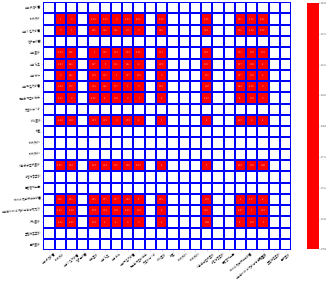

In [24]:
plt.figure(figsize=(20,20),dpi=20)
plt.rcParams['font.sans-serif'] = ['STsong']
sns.heatmap(data_num.iloc[:,:-1].corr().map(lambda x:round(x,2)),
            center=0,square=True,annot=True,vmax=1,vmin=1,
            cmap='bwr',cbar_kws={'shrink': 0.8},edgecolor='blue',
            linewidths=.3,linecolor='blue'
            )
plt.xticks(rotation=40)
plt.yticks(rotation=5)
plt.savefig('./相关性.png')

In [25]:
data_cat_s = data_cat[data_cat['province'] =='湖南']
data_cat_n  = data_cat[data_cat['province'] == '湖北']

ModuleNotFoundError: No module named 'dataprep'